In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv(r"D:\Data Analysis Projects\Salary Predictor\Salary_Data.csv")
df.head()

,Age,Experience,Salary
0,21.0,1.1,39343
1,21.5,1.3,46205
2,21.7,1.5,37731
3,22.0,2.0,43525
4,22.2,2.2,39891


#### Data Visualization

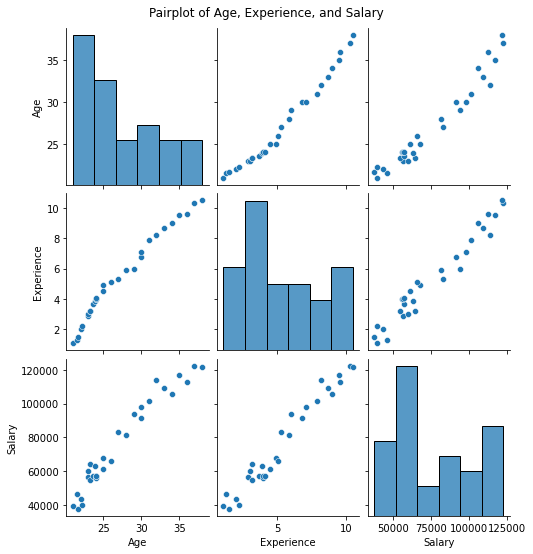

In [3]:
sns.pairplot(df)
plt.suptitle("Pairplot of Age, Experience, and Salary", y=1.02)
plt.show()

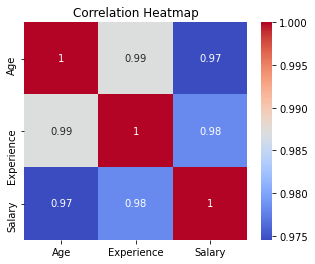

In [4]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

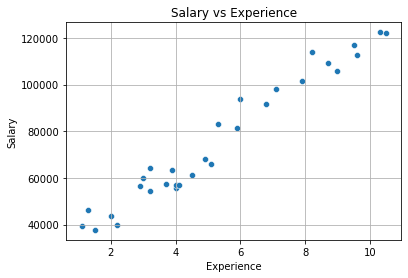

In [5]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Experience', y='Salary', data=df)
plt.title("Salary vs Experience")
plt.grid(True)
plt.show()

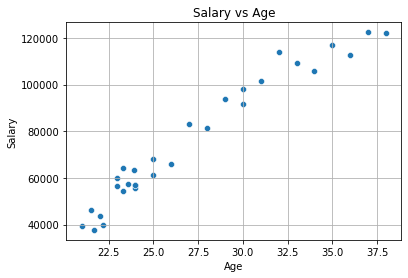

In [6]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Salary vs Age")
plt.grid(True)
plt.show()

#### Prepare Features and Target

In [7]:
X = df[['Age', 'Experience']]  
y = df['Salary']

#### Split Dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#### Train Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate the Model

In [10]:
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Squared Error: 58634181.7139824
R² Score: 0.8852101657216536


####  Root Mean Squared Error (RMSE)

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 7657.295979259415


#### User Input for Prediction

In [13]:
print("Predict Salary for New Input")
try:
    input_age = float(input("Enter Age: "))
    input_exp = float(input("Enter Years of Experience: "))
    input_features = [[input_age, input_exp]]
    predicted_salary = model.predict(input_features)[0]
    print(f"\n✅ Expected Salary for Age {input_age} and Experience {input_exp} years is: ₹{predicted_salary:,.2f}")
except Exception as e:
    print("⚠️ Invalid input. Please enter numeric values only.")

Predict Salary for New Input
Enter Age: 25.6
Enter Years of Experience: 2

✅ Expected Salary for Age 25.6 and Experience 2.0 years is: ₹54,880.08
